# Линейная регрессия
__Суммарное количество баллов: 10__

In [ ]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy

In [ ]:
def read_data(path="boston.csv"):
    dataframe = np.genfromtxt(path, delimiter=",", skip_header=15)
    np.random.seed(42)
    np.random.shuffle(dataframe)
    X = dataframe[:, :-1]
    y = dataframe[:, -1]
    return X, y

In [ ]:
def generate_synthetic(size:int, dim=6, noise=0.1):
    X = np.random.randn(size, dim)
    w = np.random.randn(dim + 1)
    noise = noise * np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y

In [ ]:
X, y = read_data()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Task 1
def mse(y_true:np.ndarray, y_predicted:np.ndarray):
    return np.sum((y_true - y_predicted) ** 2) / y_true.shape[0]

def r2(y_true:np.ndarray, y_predicted:np.ndarray):
    diff2 = (y_true - y_predicted) ** 2
    m = np.mean(y_true)
    tot = np.sum((y_true - m) ** 2)
    resid = np.sum(diff2)
    return (tot - resid) / tot

In [ ]:

# Task 1

def mse(y_true:np.ndarray, y_predicted:np.ndarray):
    return 0.0

def r2(y_true:np.ndarray, y_predicted:np.ndarray):
    return 0.0

# Task 2

class NormalLR:
    def __init__(self):
        self.weights = None # Save weights here
    
    def fit(self, X:np.ndarray, y:np.ndarray):
        pass
    
    def predict(self, X:np.ndarray) -> np.ndarray:
        pass
    
# Task 3

class GradientLR:
    def __init__(self, alpha:float, iterations=10000, l=0.):
        self.weights = None # Save weights here
    
    def fit(self, X:np.ndarray, y:np.ndarray):
        pass

    def predict(self, X:np.ndarray):
        pass

# Task 4

def get_feature_importance(linear_regression):
    return []

def get_most_important_features(linear_regression):
    return []

### Задание 1 (1 балл)
Для начала нужно понять, какую метрику для ошибки будем использовать. В нашем случае нам подойдет стандартная метрика MSE. Также чтобы оценить качество модели нам понадобится метрика $R^2$. Реализуйте обе эти метрики.

In [ ]:
from task import mse, r2

### Задание 2 (3 балла)
Теперь реализуем линейную регрессию при помощи явного решения задачи минимизации. 

#### Методы
`fit(X, y)` - решает задачу минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$. 

`predict(X)` - строит предсказание `y` для объектов из `X`.

In [ ]:
def add_one_left(X):
    return np.concatenate(([1], X))

class NormalLR:
    def __init__(self):
        self.weights = None # Save weights here
    
    def fit(self, X:np.ndarray, y:np.ndarray):
        x_ext = np.apply_along_axis(add_one_left, 1, X)
        x_ext_tr = x_ext.transpose()
                
        self.x_sword =  np.dot(np.linalg.inv(np.matmul(x_ext_tr, x_ext)), x_ext_tr)
        self.weights = np.dot(self.x_sword, y)
    
    def predict(self, X:np.ndarray) -> np.ndarray:
        x_ext = np.apply_along_axis(add_one_left, 1, X)
        return np.dot(x_ext, self.weights) 

In [ ]:
from task import NormalLR

In [ ]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
regr = NormalLR()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f"MSE: {mse(y_test, y_pred)}, R2: {r2(y_test, y_pred)}")

MSE: 0.009749306748453547, R2: 0.9964719373674387


### Задание 3 (4 балла)
Теперь реализуем линейную регрессию с использованием градиентного спуска с larning rate `alpha` в течении `iterations` итераций. В задании необходимо использовать регуляризацию Лассо с коэффициентом `l`.

#### Методы
`fit(X, y)` - приближает решение задачи минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$ при помощи градиентного спуска. 


`predict(X)` - строит предсказание `y` для объектов из `X`.

In [ ]:

from sklearn import preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x = [[1, 2, 3], [1, 1, 1], [2, 2, 2]]
y = [1, 2, 2]
x_transformed = scaler.fit_transform(x)

print(x, x_transformed)

x2 = scaler.inverse_transform(x_transformed, copy=True)

print(x2)

[[1, 2, 3], [1, 1, 1], [2, 2, 2]] [[-0.70710678  0.70710678  1.22474487]
 [-0.70710678 -1.41421356 -1.22474487]
 [ 1.41421356  0.70710678  0.        ]]
[[1. 2. 3.]
 [1. 1. 1.]
 [2. 2. 2.]]


In [ ]:
print(x)
x3 = myScaler(x)
print(x3)

[[2, 2, 2], [1, 1, 1], [2, 2, 2]]
[2 2 2]
[1 1 1]
[[1. 1. 1.]
 [0. 0. 0.]
 [1. 1. 1.]]


In [ ]:
class MyScaler:
  def fit(self, x):
    maxes = np.copy(x[0])
    mines = np.copy(x[0])
    for line in x:
      for i in range(len(line)):
        maxes[i] = max(maxes[i], line[i])
        mines[i] = min(mines[i], line[i])
    self.maxes = maxes
    self.mines = mines
  
  def transform(self, x):
    mines = self.mines
    maxes = self.maxes
    x_res = np.copy(np.vstack([self.mines, self.maxes])) #just for next vstack usages to work
    for line in x:
      row = np.array([(line[i] - mines[i]) / (maxes[i] - mines[i]) if maxes[i] != mines[i] else 0 for i in range(len(line))])
      x_res = np.vstack([x_res, row])
    return x_res[2:]

  def fit_y(self, y):
    self.maxY = max(y)
    self.minY = min(y)
 
  def transform_y(self, y):
    return np.array([(label - self.minY) / (self.maxY - self.minY) for label in y])
  
  def inverse_transform_y(self, y):
    return np.array([(label * (self.maxY - self.minY) + self.minY) for label in y])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
class GradientLR:
    def __init__(self, alpha:float, iterations=10000, l=0.):
        self.alpha = alpha
        self.iterations = iterations
        self.l = l

    def fit(self, X:np.ndarray, y:np.ndarray):
        self.scaler = MinMaxScaler()
        self.scaler.fit(X)
        X = self.scaler.transform(X)
        x_ext = np.apply_along_axis(add_one_left, 1, X)
        self.weights = np.zeros(x_ext.shape[1])

        #self.scaler.fit_y(y)
        #y = self.scaler.transform_y(y)
        for i in range(self.iterations):
            y_predicted = np.dot(x_ext, self.weights)
            gradient = np.dot(y_predicted - y, x_ext) / x_ext.shape[0]
            gradient += np.dot(self.l, np.sign(self.weights))
            #gradient += np.dot(self.l, np.array(self.weights))
            self.weights -= np.dot(self.alpha, gradient)

    def predict(self, X:np.ndarray):
        X = self.scaler.transform(X)
        if (X.shape[1] < self.weights.shape[0]):
            X = np.apply_along_axis(add_one_left, 1, X)
        return np.dot(X, self.weights) 
        #return self.scaler.inverse_transform_y(np.dot(X, self.weights)) 

In [ ]:
def build_plot(X_train, y_train, X_test, y_test):
    xs = np.arange(0.0, 0.02, 0.0002)
    errors = []
    for x in xs:
        regr = GradientLR(0.1, iterations=10000, l=x)
        regr.fit(X_train, y_train)
        errors.append(mse(y_test, regr.predict(X_test)))
    plt.figure(figsize=(9, 4))
    plt.xlim(xs[0], xs[-1])
    plt.grid()
    plt.plot(xs, errors)
    plt.show()

In [ ]:
X, y = generate_synthetic(1024)
X, X_val, y, y_val = train_test_split(X, y, train_size=0.9, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

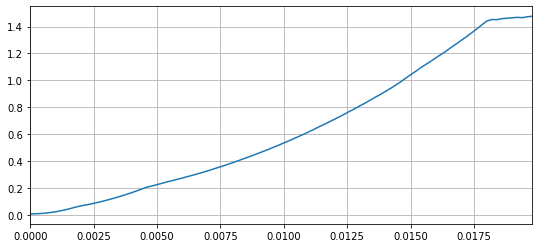

In [ ]:
build_plot(X_train, y_train, X_val, y_val)

In [ ]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f"MSE: {mse(y_test, y_pred)}, R2: {r2(y_test, y_pred)}")

MSE: 0.011010613539734083, R2: 0.9981701599975706


### Задание 4 (2 балла)
Линейная регрессия является методом, который можно интерпретировать основываясь на значениях весов модели. Реализуйте метод, который будет упорядочивать признаки по их важности от наибольшей важности к наименьшей.

Обратите внимание, что такая интерпретация имеет смысл только если данные предварительно нормализованы, а также в признаках нет мультиколлинеарности (если используете обычную линейную регрессию).

#### Методы
`get_feature_importance` - метод, который вычисляет важность для каждого признака. Принимает на вход обученную линейную регрессию, возвращает список значений метрики важности признаков.

`get_most_important_features`- метод, который упорядочевает признаки по их важности в порядке убывания. Принимает на вход обученную линейную регрессию, возвращает упорядоченный список, состоящий из индексов признаков.

In [ ]:
def get_feature_importance(linear_regression):
    return np.abs(linear_regression.weights[1:])

def get_most_important_features(linear_regression):
    return list(zip(*sorted(enumerate(get_feature_importance(linear_regression)), key=lambda x :x[1], reverse=True)))[0]

In [ ]:
regr = NormalLR()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print(get_feature_importance(regr))
print(get_most_important_features(regr))

[0.4515153  0.77371078 0.05516782 1.4815458  1.64594382 0.11396867]
(4, 3, 1, 0, 5, 2)


In [ ]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print(get_feature_importance(regr))
print(get_most_important_features(regr))

[ 2.56456896  4.85596185  0.38279804  9.1519915  10.36314278  0.65613005]
(4, 3, 1, 0, 5, 2)


### Дополнительно
Протесируйте оба метода на данных `boston.csv`, для градиентного спуска постройте график зависимости ошибки от коэффициента регуляризации. 

In [ ]:
X, y = read_data()
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, shuffle=False)

In [ ]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(f"MSE: {mse(y_val, y_pred)}, R2: {r2(y_test, y_val)}")

In [ ]:
build_plot(X_train, y_train, X_val, y_val)

In [ ]:
regr = GradientLR(0.1, iterations=10000)
regr.fit(X_train, y_train)
print(f"MSE: {mse(y_val, y_pred)}, R2: {r2(y_test, y_val)}")

Проинтерпритируйте полученные результаты. Опишите влияние каждого признака на результат предсказания.